In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('train_2.csv')
total_feat1=pd.read_csv('total_feat1.csv')
total_feat2=pd.read_csv('total_feat2.csv')
total_feat3=pd.read_csv('total_feat3.csv')
total_feat4=pd.read_csv('total_feat4.csv')
total_feat5=pd.read_csv('total_feat5.csv')
total_feat6=pd.read_csv('total_feat6.csv')
total_feat7=pd.read_csv('total_feat7.csv')
total_feat8=pd.read_csv('total_feat8.csv')
target1=pd.read_csv('target1.csv')
target2=pd.read_csv('target2.csv')
target3=pd.read_csv('target3.csv')
target4=pd.read_csv('target4.csv')
target5=pd.read_csv('target5.csv')
target6=pd.read_csv('target6.csv')
target7=pd.read_csv('target7.csv')
target8=pd.read_csv('target8.csv')
eda_train_imp=pd.read_csv('eda_train_imp.csv')

In [ ]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


## Model 1

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - ETA: 0s - loss: 1.6827
Epoch 00001: val_loss improved from inf to 0.59276, saving model to model1_lstm.hdf5
7/7 [==============================] - 2s 329ms/step - loss: 1.6827 - val_loss: 0.5928
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 0.3335
Epoch 00002: val_loss improved from 0.59276 to 0.27657, saving model to model1_lstm.hdf5
7/7 [==============================] - 1s 133ms/step - loss: 0.3335 - val_loss: 0.2766
Epoch 3/50
7/7

7/7 [==============================] - ETA: 0s - loss: 0.0142
Epoch 00035: val_loss did not improve from 0.00783
7/7 [==============================] - 1s 137ms/step - loss: 0.0142 - val_loss: 0.0180
Epoch 36/50
7/7 [==============================] - ETA: 0s - loss: 0.0134
Epoch 00036: val_loss did not improve from 0.00783
7/7 [==============================] - 1s 139ms/step - loss: 0.0134 - val_loss: 0.0160
Epoch 37/50
7/7 [==============================] - ETA: 0s - loss: 0.0212
Epoch 00037: val_loss did not improve from 0.00783
7/7 [==============================] - 1s 121ms/step - loss: 0.0212 - val_loss: 0.0129
Epoch 38/50
7/7 [==============================] - ETA: 0s - loss: 0.0345
Epoch 00038: val_loss did not improve from 0.00783
7/7 [==============================] - 1s 118ms/step - loss: 0.0345 - val_loss: 0.0117
Epoch 39/50
7/7 [==============================] - ETA: 0s - loss: 0.0410
Epoch 00039: val_loss did not improve from 0.00783
7/7 [==============================] - 

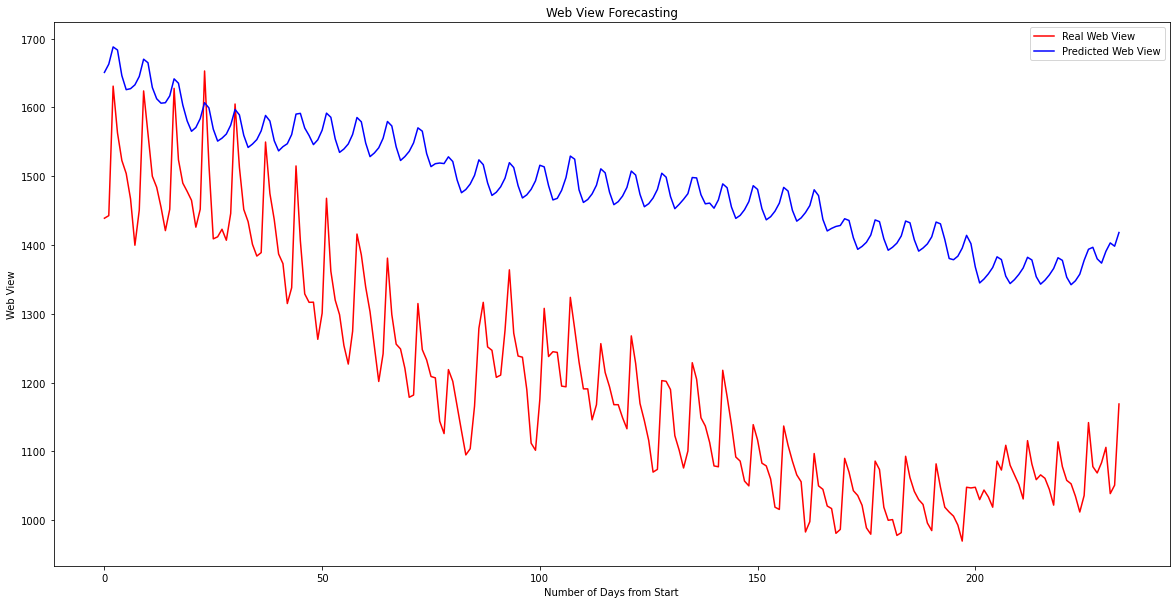

Score for the model  21.765665800763635


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat1, target1, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model1=Sequential()
model1.add(Bidirectional(
            LSTM(units=256,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )

model1.add(Bidirectional(
            LSTM(units=64,
                 activation='relu',
                 return_sequences=True
                )
        )
         )

         
model1.add(Bidirectional(
            LSTM(units=32,
                 activation='relu',
                 
                )
        )
         )
         
#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

model1.add(Dense(1))
opt=Adam(learning_rate=0.001)
model1.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model1_lstm.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model1.fit(train_x,train_y,epochs=50,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model1.load_weights('model1_lstm.hdf5')
model1.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model1.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 2

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - ETA: 0s - loss: 1.7784
Epoch 00001: val_loss improved from inf to 0.85111, saving model to model2_lstm.hdf5
7/7 [==============================] - 3s 465ms/step - loss: 1.7784 - val_loss: 0.8511
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.3230
Epoch 00002: val_loss improved from 0.85111 to 0.16708, saving model to model2_lstm.hdf5
7/7 [==============================] - 2s 230ms/step - loss: 0.3230 - val_loss: 0.1671
Epoch 3/100


Epoch 35/100
7/7 [==============================] - ETA: 0s - loss: 0.0551
Epoch 00035: val_loss did not improve from 0.01594
7/7 [==============================] - 1s 191ms/step - loss: 0.0551 - val_loss: 0.0569
Epoch 36/100
7/7 [==============================] - ETA: 0s - loss: 0.0710
Epoch 00036: val_loss did not improve from 0.01594
7/7 [==============================] - 1s 189ms/step - loss: 0.0710 - val_loss: 0.0327
Epoch 37/100
7/7 [==============================] - ETA: 0s - loss: 0.0305
Epoch 00037: val_loss did not improve from 0.01594
7/7 [==============================] - 1s 191ms/step - loss: 0.0305 - val_loss: 0.0207
Epoch 38/100
7/7 [==============================] - ETA: 0s - loss: 0.0258
Epoch 00038: val_loss did not improve from 0.01594
7/7 [==============================] - 1s 213ms/step - loss: 0.0258 - val_loss: 0.0300
Epoch 39/100
7/7 [==============================] - ETA: 0s - loss: 0.0238
Epoch 00039: val_loss did not improve from 0.01594
7/7 [=================

Epoch 73/100
7/7 [==============================] - ETA: 0s - loss: 0.0282
Epoch 00073: val_loss did not improve from 0.01289
7/7 [==============================] - 2s 237ms/step - loss: 0.0282 - val_loss: 0.0259
Epoch 74/100
7/7 [==============================] - ETA: 0s - loss: 0.0296
Epoch 00074: val_loss did not improve from 0.01289
7/7 [==============================] - 1s 213ms/step - loss: 0.0296 - val_loss: 0.0142
Epoch 75/100
7/7 [==============================] - ETA: 0s - loss: 0.0163
Epoch 00075: val_loss did not improve from 0.01289
7/7 [==============================] - 1s 204ms/step - loss: 0.0163 - val_loss: 0.0155
Epoch 76/100
7/7 [==============================] - ETA: 0s - loss: 0.0177
Epoch 00076: val_loss did not improve from 0.01289
7/7 [==============================] - 2s 231ms/step - loss: 0.0177 - val_loss: 0.0141
Epoch 77/100
7/7 [==============================] - ETA: 0s - loss: 0.0237
Epoch 00077: val_loss did not improve from 0.01289
7/7 [=================

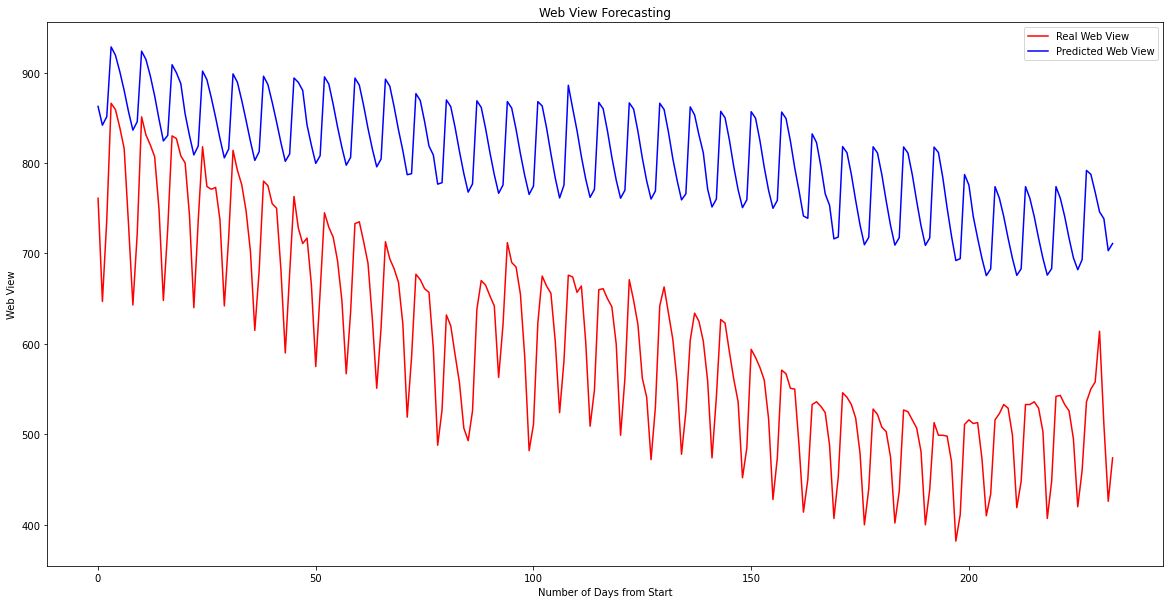

Score for the model  30.488474922536547


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat2, target2, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model2=Sequential()
model2.add(Bidirectional(
            LSTM(units=256,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )
         
model2.add(Bidirectional(
            LSTM(units=128,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )
model2.add(Bidirectional(
            LSTM(units=64,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )


model2.add(Bidirectional(
            LSTM(units=32,
                 activation='relu',
                 
                )
        )
         )
         
#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

model2.add(Dense(1))
opt=Adam(learning_rate=0.001)
model2.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model2_lstm.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model2.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model2.load_weights('model2_lstm.hdf5')
model2.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model2.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 3

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6/7 [========================>.....] - ETA: 0s - loss: 1.8615
Epoch 00001: val_loss improved from inf to 1.55903, saving model to model3_lstm.hdf5
7/7 [==============================] - 1s 207ms/step - loss: 1.8383 - val_loss: 1.5590
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 1.0514
Epoch 00002: val_loss improved from 1.55903 to 0.77564, saving model to model3_lstm.hdf5
7/7 [==============================] - 0s 49ms/step - loss: 1.0514 - val_loss: 0.7756
Epoch 3/50
7/7 

Epoch 00034: val_loss did not improve from 0.01313
7/7 [==============================] - 0s 29ms/step - loss: 0.0310 - val_loss: 0.0491
Epoch 35/50
7/7 [==============================] - ETA: 0s - loss: 0.0242
Epoch 00035: val_loss did not improve from 0.01313
7/7 [==============================] - 0s 29ms/step - loss: 0.0242 - val_loss: 0.0161
Epoch 36/50
6/7 [========================>.....] - ETA: 0s - loss: 0.0587
Epoch 00036: val_loss did not improve from 0.01313
7/7 [==============================] - 0s 31ms/step - loss: 0.0554 - val_loss: 0.0157
Epoch 37/50
6/7 [========================>.....] - ETA: 0s - loss: 0.0668
Epoch 00037: val_loss did not improve from 0.01313
7/7 [==============================] - 0s 31ms/step - loss: 0.0642 - val_loss: 0.0571
Epoch 38/50
5/7 [====================>.........] - ETA: 0s - loss: 0.0168
Epoch 00038: val_loss did not improve from 0.01313
7/7 [==============================] - 0s 31ms/step - loss: 0.0142 - val_loss: 0.0157
Epoch 39/50
6/7 [==

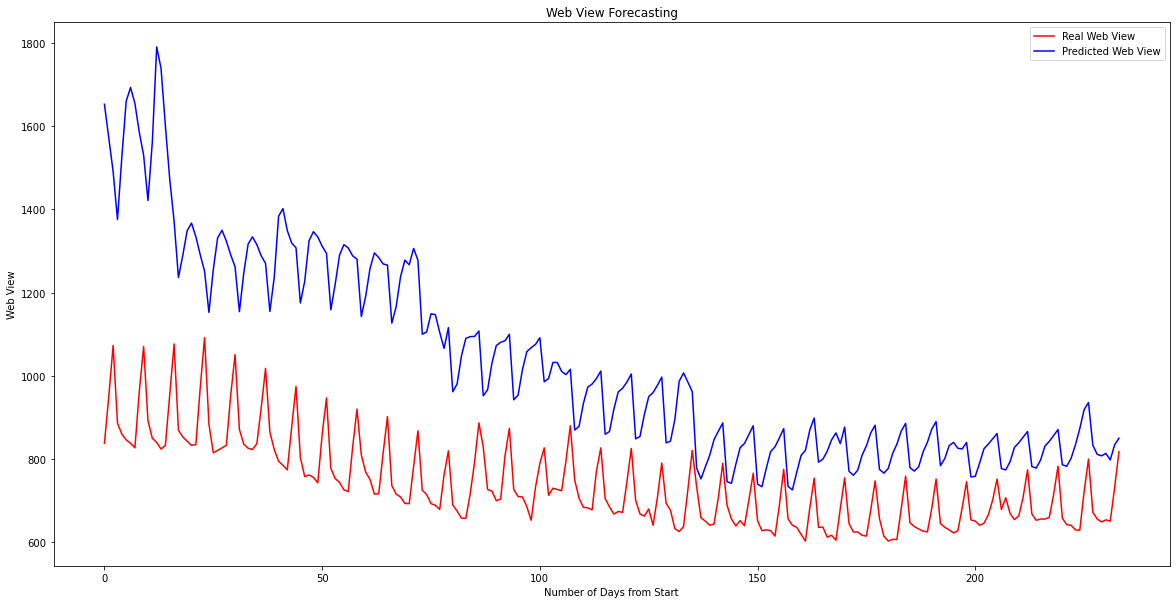

Score for the model  31.227234757176465


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat3, target3, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model3=Sequential()
model3.add(Bidirectional(
            LSTM(units=64,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )
         

model3.add(Bidirectional(
            LSTM(units=12,
                 activation='relu',
                 return_sequences=True
                )
        )
         )

model3.add(Bidirectional(
            LSTM(units=4,
                 activation='relu',
                 
                )
        )
         )

#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

model3.add(Dense(1))
opt=Adam(learning_rate=0.001)
model3.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model3_lstm.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model3.fit(train_x,train_y,epochs=50,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model3.load_weights('model3_lstm.hdf5')
model3.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model3.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 4

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - ETA: 0s - loss: 1.6160
Epoch 00001: val_loss improved from inf to 0.86931, saving model to model4_lstm.hdf5
7/7 [==============================] - 2s 338ms/step - loss: 1.6160 - val_loss: 0.8693
Epoch 2/50
6/7 [========================>.....] - ETA: 0s - loss: 0.3942
Epoch 00002: val_loss improved from 0.86931 to 0.51111, saving model to model4_lstm.hdf5
7/7 [==============================] - 0s 68ms/step - loss: 0.4284 - val_loss: 0.5111
Epoch 3/50
6/7 

7/7 [==============================] - 1s 100ms/step - loss: 0.0715 - val_loss: 0.0277
Epoch 35/50
7/7 [==============================] - ETA: 0s - loss: 0.1040
Epoch 00035: val_loss did not improve from 0.02771
7/7 [==============================] - 1s 77ms/step - loss: 0.1040 - val_loss: 0.0936
Epoch 36/50
7/7 [==============================] - ETA: 0s - loss: 0.0804
Epoch 00036: val_loss did not improve from 0.02771
7/7 [==============================] - 0s 69ms/step - loss: 0.0804 - val_loss: 0.0315
Epoch 37/50
6/7 [========================>.....] - ETA: 0s - loss: 0.1010
Epoch 00037: val_loss did not improve from 0.02771
7/7 [==============================] - 0s 67ms/step - loss: 0.0936 - val_loss: 0.0824
Epoch 38/50
6/7 [========================>.....] - ETA: 0s - loss: 0.0935
Epoch 00038: val_loss improved from 0.02771 to 0.02568, saving model to model4_lstm.hdf5
7/7 [==============================] - 1s 79ms/step - loss: 0.0830 - val_loss: 0.0257
Epoch 39/50
6/7 [==============

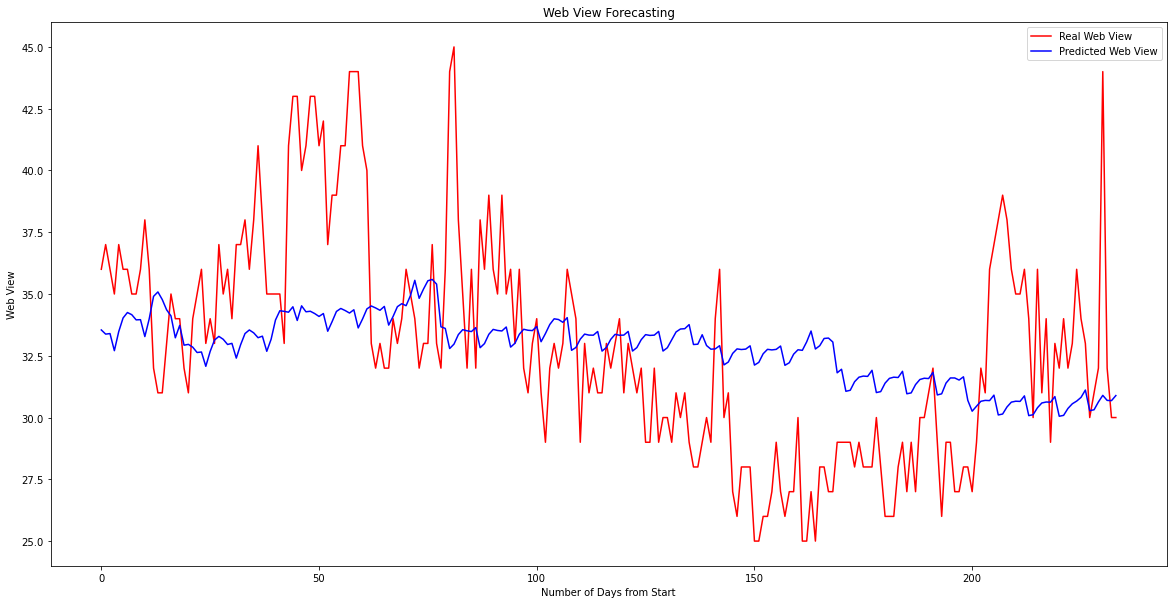

Score for the model  10.404048439443237


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat4, target4, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model4=Sequential()
model4.add(Bidirectional(
            LSTM(units=128,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )
         
model4.add(Bidirectional(
            LSTM(units=64,
                 activation='relu',
                 return_sequences=True
                )
        )
         )

model4.add(Bidirectional(
            LSTM(units=8,
                 activation='relu',
                 
                )
        )
         )


#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

model4.add(Dense(1))
opt=Adam(learning_rate=0.001)
model4.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model4_lstm.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model4.fit(train_x,train_y,epochs=50,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model4.load_weights('model4_lstm.hdf5')
model4.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model4.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 5

Epoch 1/60

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

7/7 [==============================] - ETA: 0s - loss: 1.7499
Epoch 00001: val_loss improved from inf to 1.31106, saving model to model5_lstm.hdf5
7/7 [==============================] - 2s 233ms/step - loss: 1.7499 - val_loss: 1.3111
Epoch 2/60
7/7 [==============================] - ETA: 0s - loss: 0.6964
Epoch 00002: val_loss improved from 1.31106 to 0.80158, saving model to model5_lstm.hdf5
7/7 [==============================] - 1s 78ms/step - loss: 0.6964 - val_loss: 0.8016
Epoch 3/60
7/7 [==============================] - ETA: 0s - loss: 0.4175
Epoch 00003: val_loss improved from 0.80158 to 0.06979, saving model to model5_lstm.hdf5
7/7 [==============================] - 0s 65ms/step - loss: 0.4175 - val_loss: 0.0698
Epoch 4/60
7/7 [==============================] - ETA: 0s - loss: 0.4175
Epoch 00004: val_loss did not improve from 0.06979
7/7 [==============================] - 0s 58ms/step - loss: 0.4175 - val_loss: 0.2877
Epoch 5/60
7/7 [==============================] - ETA: 0s - 

Epoch 39/60
7/7 [==============================] - ETA: 0s - loss: 0.0943
Epoch 00039: val_loss did not improve from 0.04943
7/7 [==============================] - 0s 58ms/step - loss: 0.0943 - val_loss: 0.2201
Epoch 40/60
7/7 [==============================] - ETA: 0s - loss: 0.0926
Epoch 00040: val_loss did not improve from 0.04943
7/7 [==============================] - 0s 57ms/step - loss: 0.0926 - val_loss: 0.1864
Epoch 41/60
7/7 [==============================] - ETA: 0s - loss: 0.1169
Epoch 00041: val_loss did not improve from 0.04943
7/7 [==============================] - 0s 58ms/step - loss: 0.1169 - val_loss: 0.2593
Epoch 42/60
6/7 [========================>.....] - ETA: 0s - loss: 0.0755
Epoch 00042: val_loss did not improve from 0.04943
7/7 [==============================] - 0s 57ms/step - loss: 0.0863 - val_loss: 0.1886
Epoch 43/60
7/7 [==============================] - ETA: 0s - loss: 0.1290
Epoch 00043: val_loss did not improve from 0.04943
7/7 [==========================

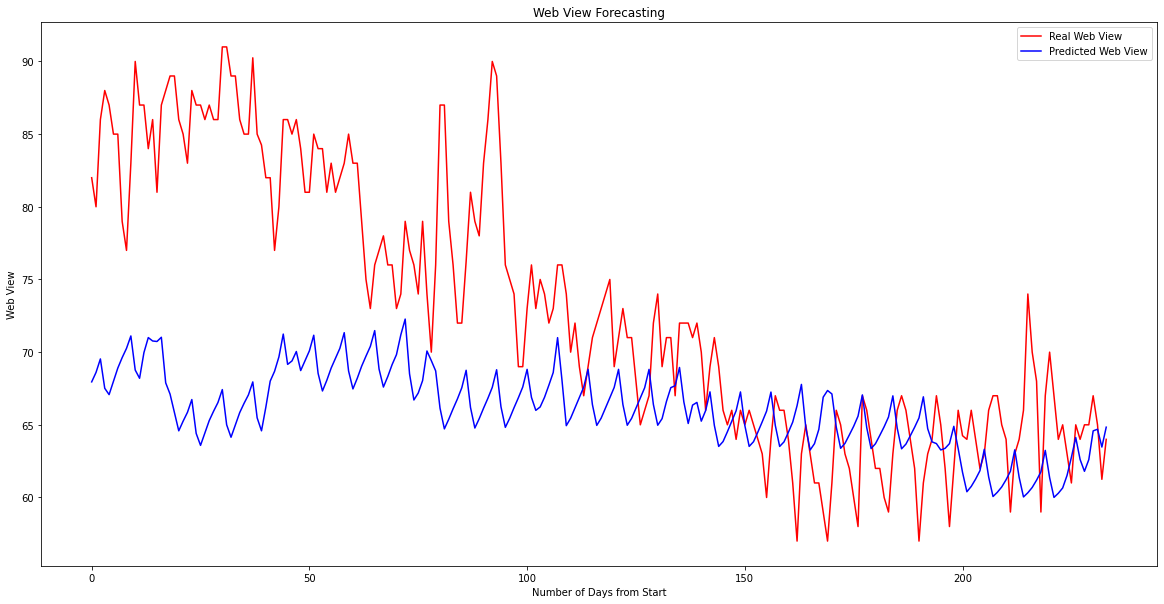

Score for the model  11.271723345448367


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat5, target5, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model5=Sequential()
model5.add(Bidirectional(
            LSTM(units=128,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )
         
model5.add(Bidirectional(
            LSTM(units=64,
                 activation='relu',
                 return_sequences=True
                )
        )
         )
model5.add(Bidirectional(
            LSTM(units=8,
                 activation='relu',
                 
                )
        )
         )


def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

model5.add(Dense(1))
opt=Adam(learning_rate=0.001)
model5.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model5_lstm.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model5.fit(train_x,train_y,epochs=60,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model5.load_weights('model5_lstm.hdf5')
model5.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model5.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 6

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - ETA: 0s - loss: 1.6303
Epoch 00001: val_loss improved from inf to 0.68140, saving model to model6_lstm.hdf5
7/7 [==============================] - 2s 269ms/step - loss: 1.6303 - val_loss: 0.6814
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.3371
Epoch 00002: val_loss improved from 0.68140 to 0.25668, saving model to model6_lstm.hdf5
7/7 [==============================] - 0s 64ms/step - loss: 0.3371 - val_loss: 0.2567
Epoch 3/100
7

Epoch 35/100
7/7 [==============================] - ETA: 0s - loss: 0.0616
Epoch 00035: val_loss did not improve from 0.02376
7/7 [==============================] - 0s 66ms/step - loss: 0.0616 - val_loss: 0.0791
Epoch 36/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1068
Epoch 00036: val_loss did not improve from 0.02376
7/7 [==============================] - 0s 64ms/step - loss: 0.1062 - val_loss: 0.1479
Epoch 37/100
7/7 [==============================] - ETA: 0s - loss: 0.0889
Epoch 00037: val_loss did not improve from 0.02376
7/7 [==============================] - 0s 66ms/step - loss: 0.0889 - val_loss: 0.1355
Epoch 38/100
7/7 [==============================] - ETA: 0s - loss: 0.0744
Epoch 00038: val_loss did not improve from 0.02376
7/7 [==============================] - 0s 62ms/step - loss: 0.0744 - val_loss: 0.1436
Epoch 39/100
6/7 [========================>.....] - ETA: 0s - loss: 0.0639
Epoch 00039: val_loss did not improve from 0.02376
7/7 [=====================

Epoch 74/100
7/7 [==============================] - ETA: 0s - loss: 0.0621
Epoch 00074: val_loss did not improve from 0.02376
7/7 [==============================] - 0s 64ms/step - loss: 0.0621 - val_loss: 0.1305
Epoch 75/100
7/7 [==============================] - ETA: 0s - loss: 0.0783
Epoch 00075: val_loss did not improve from 0.02376
7/7 [==============================] - 0s 66ms/step - loss: 0.0783 - val_loss: 0.1909
Epoch 76/100
7/7 [==============================] - ETA: 0s - loss: 0.0539
Epoch 00076: val_loss did not improve from 0.02376
7/7 [==============================] - 1s 75ms/step - loss: 0.0539 - val_loss: 0.0933
Epoch 77/100
6/7 [========================>.....] - ETA: 0s - loss: 0.0945
Epoch 00077: val_loss did not improve from 0.02376
7/7 [==============================] - 1s 73ms/step - loss: 0.0916 - val_loss: 0.1438
Epoch 78/100
6/7 [========================>.....] - ETA: 0s - loss: 0.0832
Epoch 00078: val_loss did not improve from 0.02376
7/7 [=====================

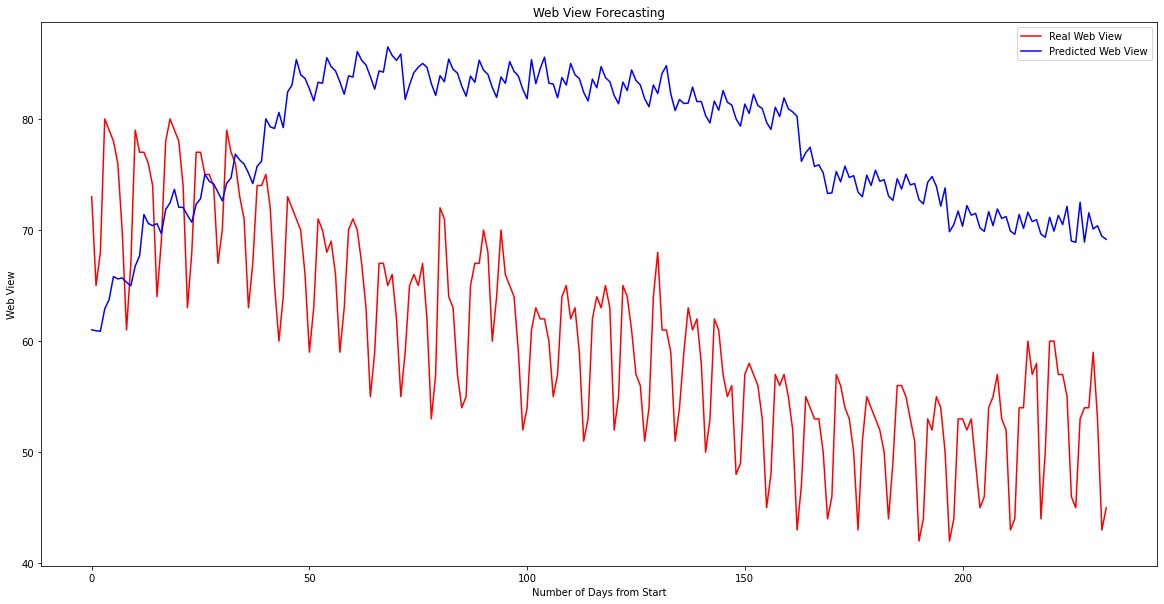

Score for the model  27.88902166853995


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat6, target6, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model6=Sequential()
model6.add(Bidirectional(
            LSTM(units=128,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )
         
model6.add(Bidirectional(
            LSTM(units=64,
                 activation='relu',
                 return_sequences=True
                )
        )
         )
model6.add(Bidirectional(
            LSTM(units=4,
                 activation='relu',
                 
                )
        )
         )


#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

model6.add(Dense(1))
opt=Adam(learning_rate=0.001)
model6.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model6_lstm.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model6.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model6.load_weights('model6_lstm.hdf5')
model6.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model6.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 7

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/60

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - ETA: 0s - loss: 1.5632
Epoch 00001: val_loss improved from inf to 0.57394, saving model to model7_lstm.hdf5
7/7 [==============================] - 2s 317ms/step - loss: 1.5632 - val_loss: 0.5739
Epoch 2/60
6/7 [========================>.....] - ETA: 0s - loss: 0.388 - ETA: 0s - loss: 0.3163
Epoch 00002: val_loss improved from 0.57394 to 0.27619, saving model to model7_lstm.hdf5
7/7 [==============================] - 0s 65ms/step - loss: 0.3053 - val_loss

6/7 [========================>.....] - ETA: 0s - loss: 0.1134
Epoch 00035: val_loss did not improve from 0.06291
7/7 [==============================] - 0s 62ms/step - loss: 0.1220 - val_loss: 0.2392
Epoch 36/60
7/7 [==============================] - ETA: 0s - loss: 0.0915
Epoch 00036: val_loss did not improve from 0.06291
7/7 [==============================] - 0s 56ms/step - loss: 0.0915 - val_loss: 0.1850
Epoch 37/60
7/7 [==============================] - ETA: 0s - loss: 0.1195
Epoch 00037: val_loss did not improve from 0.06291
7/7 [==============================] - 0s 59ms/step - loss: 0.1195 - val_loss: 0.2390
Epoch 38/60
6/7 [========================>.....] - ETA: 0s - loss: 0.0806
Epoch 00038: val_loss did not improve from 0.06291
7/7 [==============================] - 0s 53ms/step - loss: 0.0912 - val_loss: 0.1864
Epoch 39/60
7/7 [==============================] - ETA: 0s - loss: 0.1164
Epoch 00039: val_loss did not improve from 0.06291
7/7 [==============================] - 1s 7

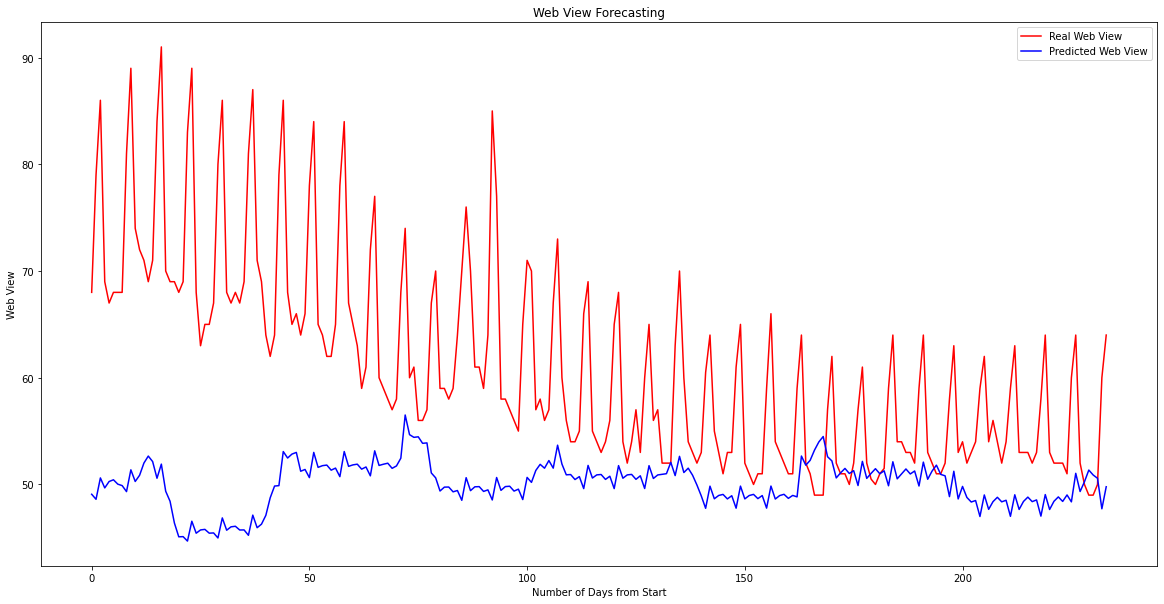

Score for the model  19.476263316326513


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat7, target7, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model7=Sequential()
model7.add(Bidirectional(
            LSTM(units=128,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )
         
model7.add(Bidirectional(
            LSTM(units=64,
                 activation='relu',
                 return_sequences=True
                )
        )
         )

model7.add(Bidirectional(
            LSTM(units=8,
                 activation='relu',
                 
                )
        )
         )

#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

model7.add(Dense(1))
opt=Adam(learning_rate=0.001)
model7.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model7_lstm.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model7.fit(train_x,train_y,epochs=60,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model7.load_weights('model7_lstm.hdf5')
model7.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model7.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 8

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - ETA: 0s - loss: 0.9897
Epoch 00001: val_loss improved from inf to 0.28518, saving model to model8_lstm.hdf5
7/7 [==============================] - 2s 295ms/step - loss: 0.9897 - val_loss: 0.2852
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.4033
Epoch 00002: val_loss improved from 0.28518 to 0.10742, saving model to model8_lstm.hdf5
7/7 [==============================] - 1s 91ms/step - loss: 0.4033 - val_loss: 0.1074
Epoch 3/100
7

Epoch 36/100
7/7 [==============================] - ETA: 0s - loss: 0.1544
Epoch 00036: val_loss did not improve from 0.08197
7/7 [==============================] - 1s 79ms/step - loss: 0.1544 - val_loss: 0.2164
Epoch 37/100
7/7 [==============================] - ETA: 0s - loss: 0.1375
Epoch 00037: val_loss did not improve from 0.08197
7/7 [==============================] - 1s 80ms/step - loss: 0.1375 - val_loss: 0.1556
Epoch 38/100
7/7 [==============================] - ETA: 0s - loss: 0.1736
Epoch 00038: val_loss did not improve from 0.08197
7/7 [==============================] - 0s 65ms/step - loss: 0.1736 - val_loss: 0.2088
Epoch 39/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1460
Epoch 00039: val_loss did not improve from 0.08197
7/7 [==============================] - 0s 57ms/step - loss: 0.1557 - val_loss: 0.2401
Epoch 40/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1254
Epoch 00040: val_loss did not improve from 0.08197
7/7 [=====================

Epoch 75/100
7/7 [==============================] - ETA: 0s - loss: 0.1382
Epoch 00075: val_loss did not improve from 0.08197
7/7 [==============================] - 1s 75ms/step - loss: 0.1382 - val_loss: 0.2413
Epoch 76/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1292
Epoch 00076: val_loss did not improve from 0.08197
7/7 [==============================] - 0s 63ms/step - loss: 0.1337 - val_loss: 0.2279
Epoch 77/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1313
Epoch 00077: val_loss did not improve from 0.08197
7/7 [==============================] - 0s 57ms/step - loss: 0.1326 - val_loss: 0.2058
Epoch 78/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1520
Epoch 00078: val_loss did not improve from 0.08197
7/7 [==============================] - 0s 57ms/step - loss: 0.1574 - val_loss: 0.2816
Epoch 79/100
7/7 [==============================] - ETA: 0s - loss: 0.1429
Epoch 00079: val_loss did not improve from 0.08197
7/7 [=====================

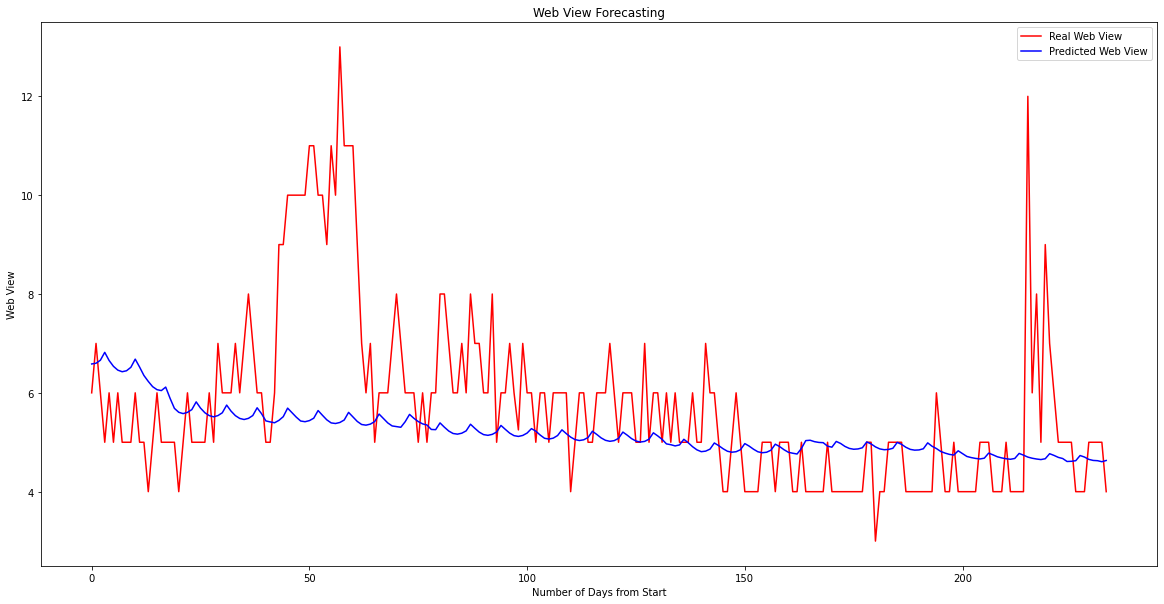

Score for the model  19.498440555326372


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat8, target8, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model8=Sequential()
model8.add(Bidirectional(
            LSTM(units=128,
                 activation='relu',
                 input_shape=(train_x.shape[0],train_x.shape[1],),
                 return_sequences=True
                )
        )
         )
         

model8.add(Bidirectional(
            LSTM(units=64,
                 activation='relu',
                 return_sequences=True
                )
        )
         )

model8.add(Bidirectional(
            LSTM(units=12,
                 activation='relu',
                 
                )
        )
         )

#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

model8.add(Dense(1))
opt=Adam(learning_rate=0.001)
model8.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model8_lstm.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model8.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model8.load_weights('model8_lstm.hdf5')
model8.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model8.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Kaggle Predictions 

In [ ]:
from datetime import date , timedelta
sdate = date(2017,9,13)   # start date
edate = date(2017,11,23)   # end date
actual_edate=date(2017,11,13)
delta = actual_edate-sdate
days= delta.days+1
test_date=pd.date_range(sdate,edate-timedelta(days=1),freq='d')
print(days)

62


In [ ]:
def global_feat(datelist):
   
    weekday_test=[]
    for i in datelist:
        weekday_test.append(i.weekday())
    weekday_test=pd.Series(weekday_test)

    month_test=[]
    for i in datelist:
        month_test.append(i.month)
    month_test=pd.Series(month_test)

    month_start_test=[]
    month_start_test=pd.Series(datelist).dt.is_month_start

    month_end_test=[]
    month_end_test=pd.Series(datelist).dt.is_month_end

    quarter_start_test=[]
    quarter_start_test=pd.Series(datelist).dt.is_quarter_start

    quarter_end_test=[]
    quarter_end_test=pd.Series(datelist).dt.is_quarter_end

    week_test=[]
    week_test=pd.Series(datelist).dt.week


    quarter_test=[]
    quarter_test=pd.Series(datelist).dt.quarter


    days_in_month_test=[]
    days_in_month_test =pd.Series(datelist).dt.days_in_month

    year_test=[]
    year_test=pd.Series(datelist).dt.year


    is_sunday_or_monday_test=[]
    for i in weekday_test:
        if i == 0 or i == 6:
            is_sunday_or_monday_test.append(1)
        else:
            is_sunday_or_monday_test.append(0)
    is_sunday_or_monday_test=pd.Series(is_sunday_or_monday_test)


    is_august_test=[]
    for i in month_test:
        if i == 8:
            is_august_test.append(1)
        else:
            is_august_test.append(0)
    is_august_test=pd.Series(is_august_test)

    year_half_test=[]
    for i in month_test:
        if i in [1,2,3,4,5,6] :
            year_half_test.append(1)
        else :
            year_half_test.append(2)
    year_half_test=pd.Series(year_half_test)

### The above features are irrespective of the page , I will call them global features
    global_feat=pd.DataFrame()
    global_feat=pd.concat([weekday_test,is_sunday_or_monday_test,month_test,is_august_test,year_half_test,quarter_test,quarter_start_test,quarter_end_test,month_start_test,month_end_test,days_in_month_test,week_test],axis=1)
    global_feat.columns=['weekday','is_sunday_or_monday','month','is_august','year_half','quarter','quarter_start','quarter_end','month_start','month_end','days_in_month','week']
    return global_feat

In [ ]:
global_feat_test=global_feat(test_date)
global_feat_test

,weekday,is_sunday_or_monday,month,is_august,year_half,quarter,quarter_start,quarter_end,month_start,month_end,days_in_month,week
0,2,0,9,0,2,3,False,False,False,False,30,37
1,3,0,9,0,2,3,False,False,False,False,30,37
2,4,0,9,0,2,3,False,False,False,False,30,37
3,5,0,9,0,2,3,False,False,False,False,30,37
4,6,1,9,0,2,3,False,False,False,False,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...
66,5,0,11,0,2,4,False,False,False,False,30,46
67,6,1,11,0,2,4,False,False,False,False,30,46
68,0,1,11,0,2,4,False,False,False,False,30,47
69,1,0,11,0,2,4,False,False,False,False,30,47


In [ ]:
viewmid=pd.read_csv('viewmid.csv')
view1=viewmid.loc[0].values[0]
view2=viewmid.loc[1].values[0]
view3=viewmid.loc[2].values[0]
view4=viewmid.loc[3].values[0]

In [ ]:
def total_feat_create(page,global_feat,eda_train_imp):
    access_index=eda_train_imp.loc[eda_train_imp['Page']==page]['Access'].values[0]
    agent_index=eda_train_imp.loc[eda_train_imp['Page']==page]['Agent'].values[0]
    viewperc=eda_train_imp.loc[eda_train_imp['Page']==page]['viewperc'].values[0]

    
    if agent_index == 1:
        spider=[1]*(global_feat.shape[0])
        non_spider=[0]*(global_feat.shape[0])
    else:
        spider=[0]*(global_feat.shape[0])
        non_spider=[1]*(global_feat.shape[0])
    spider=pd.Series(spider)
    non_spider=pd.Series(non_spider)
    page_specific_feat=pd.DataFrame()
    page_specific_feat=pd.concat([spider,non_spider],axis=1)
    page_specific_feat.columns=['spider','non_spider']
    if access_index==0:
        page_specific_feat['All_Access']=1
        page_specific_feat['Desktop']=0
        page_specific_feat['Mobile']=0

    elif access_index==1:
        page_specific_feat['All_Access']=0
        page_specific_feat['Desktop']=1
        page_specific_feat['Mobile']=0
    else:
        page_specific_feat['All_Access']=0
        page_specific_feat['Desktop']=0
        page_specific_feat['Mobile']=1

    total_feat=pd.concat([global_feat,page_specific_feat],axis=1)
    return total_feat

In [ ]:
def testing(page,global_feat,days):
    total_feat=pd.DataFrame()
    total_feat=total_feat_create(page,global_feat,eda_train_imp)
    access_index=eda_train_imp.loc[eda_train_imp['Page']==page]['Access'].values[0]
    agent_index=eda_train_imp.loc[eda_train_imp['Page']==page]['Agent'].values[0]
    viewperc=eda_train_imp.loc[eda_train_imp['Page']==page]['viewperc'].values[0]

    
    from sklearn.preprocessing import LabelEncoder
    le1=LabelEncoder()
    total_feat['month_start']=le1.fit_transform(total_feat['month_start'])


    le2=LabelEncoder()
    total_feat['month_end']=le2.fit_transform(total_feat['month_end'])


    le3=LabelEncoder()
    total_feat['quarter_start']=le3.fit_transform(total_feat['quarter_start'])


    le4=LabelEncoder()
    total_feat['quarter_end']=le4.fit_transform(total_feat['quarter_end'])



    def create_test_dataset(X,timestep=1):
        Xs=[]
        for i in range(len(X)):
            end_ix=i+timestep
            if end_ix > X.shape[0]:
                break
            
            v=X[i:end_ix]
            Xs.append(v)
            
        return np.array(Xs)

    from sklearn.preprocessing import RobustScaler
    '''
    for i in total_feat.columns:
    
        total_feat[i] = total_feat[i].astype('float')
    '''
    total_feat=np.log1p(total_feat)
    test_x=create_test_dataset(total_feat.values,7)
    
    if access_index==0 and agent_index==0:
        if viewperc>=view1:
            y_pred_lstm=model1.predict(test_x)
        else:
            y_pred_lstm=model5.predict(test_x)

    elif access_index==1 and agent_index==0:
        if viewperc>=view2:
            y_pred_lstm=model2.predict(test_x)
        else:
            y_pred_lstm=model6.predict(test_x)

    elif access_index==2 and agent_index==0:
        if viewperc>=view3:
            y_pred_lstm=model3.predict(test_x)
        else:
            y_pred_lstm=model7.predict(test_x)
    elif access_index==0 and agent_index==1:
        if viewperc>=view4:
            y_pred_lstm=model4.predict(test_x)
        else:
            y_pred_lstm=model8.predict(test_x)

    y_pred_lstm=y_pred_lstm[0:days]
    y_pred_lstm=np.exp(y_pred_lstm)-1
    y_pred_lstm=pd.DataFrame(y_pred_lstm)
    print(y_pred_lstm.shape)
    y_pred_lstm['Page']=page
    return y_pred_lstm

In [ ]:
key_data_new=pd.read_csv('key_data_pro.csv')
key_data_new.head()

,Page_name,Id
0,007_スペクター_ja.wikipedia.org_all-access_all-agents,0b293039387a
1,007_スペクター_ja.wikipedia.org_all-access_all-agents,7114389dd824
2,007_スペクター_ja.wikipedia.org_all-access_all-agents,057b02ff1f09
3,007_スペクター_ja.wikipedia.org_all-access_all-agents,bd2aca21caa3
4,007_スペクター_ja.wikipedia.org_all-access_all-agents,c0effb42cdd5


In [ ]:
pagelist=key_data_new['Page_name'].unique()
len(pagelist)

145063

In [ ]:
final_df=pd.DataFrame()
k=0
for i in pagelist:
    k=k+1
    print(k)
    preddf=testing(i,global_feat_test,days)
    final_df=pd.concat([final_df,preddf],axis=0,ignore_index=True)

final_df

In [ ]:
final_df.columns=['Visits','Page_name']
final_df.to_csv('test_out_lstm.csv')

In [ ]:
result = pd.concat([key_data_new,final_df],axis=1)
result=result[['Id','Visits']]
result.head()

,Id,Visits
0,0b293039387a,1375.193970
1,7114389dd824,1379.566772
2,057b02ff1f09,1386.494385
3,bd2aca21caa3,1396.791260
4,c0effb42cdd5,1416.706055


In [ ]:
result.to_csv('Submission_lstm_new.csv',index=False)

## Kaggle Score

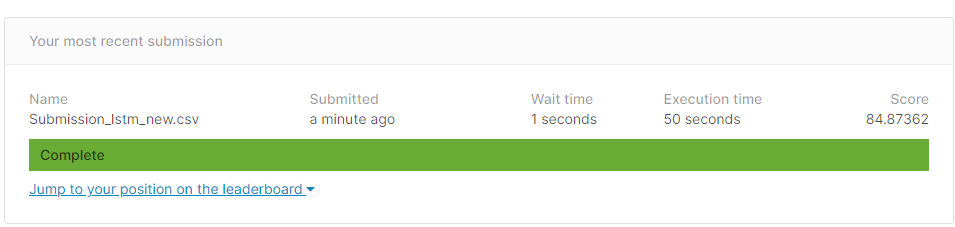

In [ ]:
from IPython.display import display
from PIL import Image


path="Screenshot_14.png"
display(Image.open(path))
